# 0. Importar bibliotecas necesarias


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# 1. Variables de entorno



*   dt = 0.1  # Paso de tiempo en la simulación.
*   t_max = 100  # Duración total de la simulación en milisegundos.
* t = np.arange(0, t_max, dt)  # Espacio de tiempo para la simulación.



In [13]:
dt = 0.1  # Paso de tiempo en la simulación
t_max = 100  # Tiempo total de simulación
t = np.arange(0, t_max, dt)  # Vector de tiempo

# Generación de Espigas (Impulsos de Acción)



*   spike_times: Generacion de espigas en tiempos aleatorios
*   x1: Trenes de espigas
*   sigma: Desviación estandar del núcleo Gaussiano
*   gaussian_kernel: Creación del Núcleo Gaussiano
*   v1: Convolución de los trenes de espigas con el Núcleo Gaussiano



In [14]:
spike_times_N1 = np.random.uniform(0, t_max, size=50)
spike_times_N2 = np.random.uniform(0, t_max, size=50)

x1 = np.zeros_like(t)
x2 = np.zeros_like(t)

spike_indices_N1 = (spike_times_N1 / dt).astype(int)  # Índices de los tiempos de espigas de N1
spike_indices_N2 = (spike_times_N2 / dt).astype(int)  # Índices de los tiempos de espigas de N2

x1[spike_indices_N1] = 1
x2[spike_indices_N2] = 1

# Núcleo Gaussiano para la Convolución
sigma = 4

# Creación del Núcleo Gaussiano
gaussian_kernel = np.exp(-0.5 * ((np.arange(-5 * sigma, 5 * sigma, dt)) / sigma) ** 2)
gaussian_kernel /= gaussian_kernel.sum()

v1 = convolve(x1, gaussian_kernel, mode='same') * dt
v2 = convolve(x2, gaussian_kernel, mode='same') * dt

# 2. Inicialización de variables para el Aprendizaje de Hebb



*   alpha = 0.1 Tasa de decaimiento
*   beta = 5000 Tasa de potenciación
*   w = 0.5 Partimos de la base de que w vale 0.5


In [15]:
alpha = 0.1  # Tasa de decaimiento
beta = 5000 # Tasa de potenciación
w = np.zeros_like(t) + 0.5  # Inicialización de los pesos sinápticos

# Simulación del cambio en los pesos sinápticos y del potencial de membrana de N2
for i in range(1, len(t)):
    dw_dt = -alpha * w[i-1] + beta * (1 - w[i-1]) * v1[i] * v2[i]
    w[i] = w[i-1] + dw_dt * dt

# 3. Visualización de los resultados


<ipython-input-16-d3077aa855a9>:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t, x1, basefmt="r", linefmt="r-", markerfmt="ro", use_line_collection=False)
<ipython-input-16-d3077aa855a9>:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t, x2, basefmt="g", linefmt="g-", markerfmt="go", use_line_collection=False)


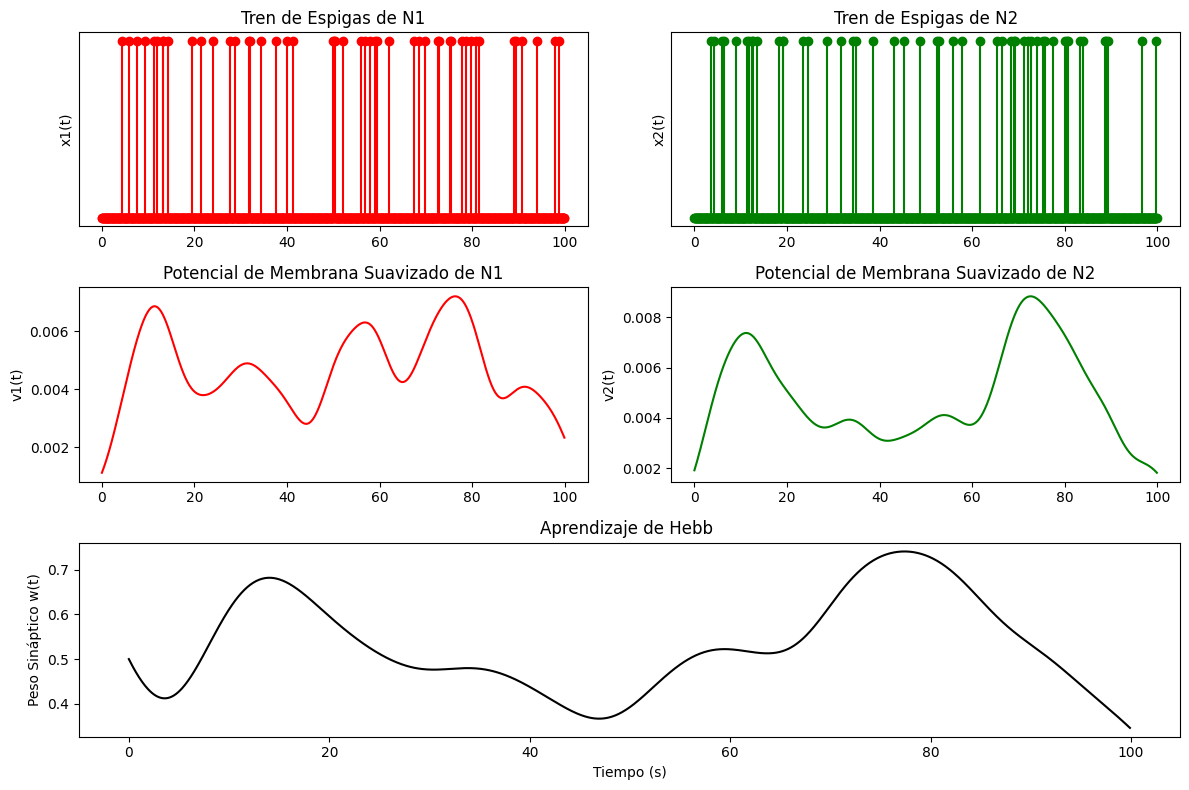

In [16]:
plt.figure(figsize=(12, 8))  # Ajustar tamaño de figura

plt.subplot(3, 2, 1)
plt.stem(t, x1, basefmt="r", linefmt="r-", markerfmt="ro", use_line_collection=False)
plt.ylabel('x1(t)')
plt.yticks([])
plt.title('Tren de Espigas de N1')

plt.subplot(3, 2, 2)
plt.stem(t, x2, basefmt="g", linefmt="g-", markerfmt="go", use_line_collection=False)
plt.ylabel('x2(t)')
plt.yticks([])
plt.title('Tren de Espigas de N2')

plt.subplot(3, 2, 3)
plt.plot(t, v1, 'r')
plt.ylabel('v1(t)')
plt.title('Potencial de Membrana Suavizado de N1')

plt.subplot(3, 2, 4)
plt.plot(t, v2, 'g')
plt.ylabel('v2(t)')
plt.title('Potencial de Membrana Suavizado de N2')

plt.subplot(3, 1, 3)
plt.plot(t, w, 'k')
plt.xlabel('Tiempo (s)')
plt.ylabel('Peso Sináptico w(t)')
plt.title('Aprendizaje de Hebb ')


plt.tight_layout()
plt.show()